In [225]:
!pip install calmap

from datetime import date
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import pandas as pd
import calmap

covid_tweets_data = pd.read_csv('covid19_tweets.csv')

In [226]:
covid_tweets_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [227]:
nRow, nCol = covid_tweets_data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 74436 rows and 13 columns


In [228]:
covid_tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74436 entries, 0 to 74435
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         74436 non-null  object
 1   user_location     59218 non-null  object
 2   user_description  70079 non-null  object
 3   user_created      74436 non-null  object
 4   user_followers    74436 non-null  int64 
 5   user_friends      74436 non-null  int64 
 6   user_favourites   74436 non-null  int64 
 7   user_verified     74436 non-null  bool  
 8   date              74436 non-null  object
 9   text              74436 non-null  object
 10  hashtags          53002 non-null  object
 11  source            74424 non-null  object
 12  is_retweet        74436 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 6.4+ MB


In [229]:
ciudades = pd.read_csv('worldcities.csv')

In [230]:
covid_tweets_data["location"] = covid_tweets_data["user_location"]
covid_tweets_data["country"] = np.NaN

In [231]:
user_location = covid_tweets_data['location'].fillna(value='').str.split(',')

In [232]:
lat = ciudades['lat'].fillna(value = '').values.tolist()
lng = ciudades['lng'].fillna(value = '').values.tolist()
country = ciudades['country'].fillna(value = '').values.tolist()

# Getting all alpha 3 codes into  a list
world_city_iso3 = []
for c in ciudades['iso3'].str.lower().str.strip().values.tolist():
    if c not in world_city_iso3:
        world_city_iso3.append(c)
        
# Getting all alpha 2 codes into  a list    
world_city_iso2 = []
for c in ciudades['iso2'].str.lower().str.strip().values.tolist():
    if c not in world_city_iso2:
        world_city_iso2.append(c)
        
# Getting all countries into  a list        
world_city_country = []
for c in ciudades['country'].str.lower().str.strip().values.tolist():
    if c not in world_city_country:
        world_city_country.append(c)

# Getting all amdin names into  a list
world_states = []
for c in ciudades['admin_name'].str.lower().str.strip().tolist():
    world_states.append(c)


# Getting all ciudades into  a list
world_city = ciudades['city'].fillna(value = '').str.lower().str.strip().values.tolist()

In [233]:
for each_loc in range(len(user_location)):
    ind = each_loc
    each_loc = user_location[each_loc]
    for each in each_loc:
        each = each.lower().strip()
        if each in world_city:
            order = world_city.index(each)
            covid_tweets_data['country'][ind] = country[order]
            continue
        if each in world_states:
            order= world_states.index(each)
            covid_tweets_data['country'][ind] = country[order]
            continue
        if each in world_city_country:
            order = world_city_country.index(each)
            covid_tweets_data['country'][ind] = world_city_country[order]
            continue
        if each in world_city_iso2:
            order = world_city_iso2.index(each)
            covid_tweets_data['country'][ind] = world_city_country[order]
            continue
        if each in world_city_iso3:
            order = world_city_iso3.index(each)
            covid_tweets_data['country'][ind] = world_city_country[order]
            continue

C:\Users\adrio\AppData\Local\Temp\ipykernel_24564\3161813259.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_tweets_data['country'][ind] = country[order]


In [234]:
print('Total Number of valid Tweets Available: ',covid_tweets_data['country'].isnull().sum())

Total Number of valid Tweets Available:  32177


            Country  Tweet Count
0     united states        13634
1             india         7469
2            canada         3730
3    united kingdom         2897
4         australia         1621
..              ...          ...
171           burma            1
172         eritrea            1
173          monaco            1
174          poland            1
175         bolivia            1

[176 rows x 2 columns]


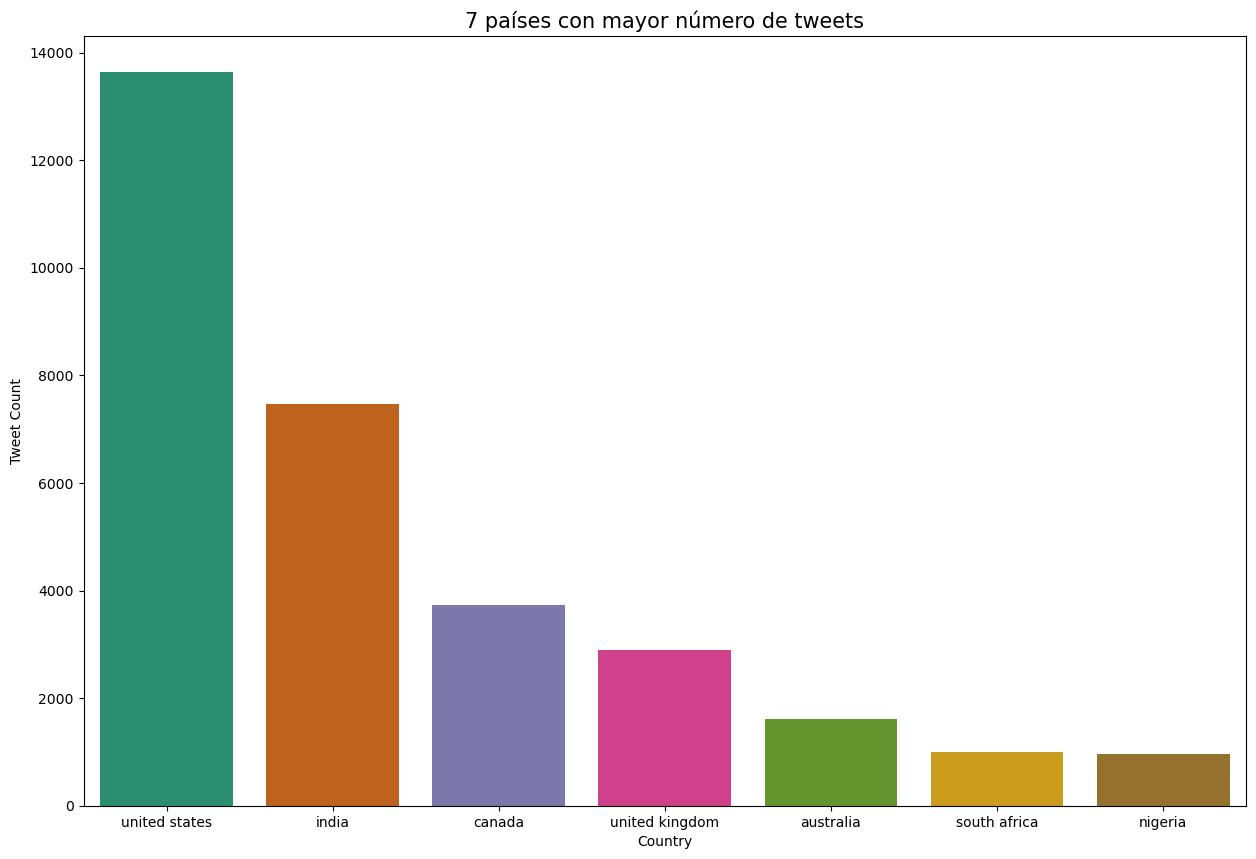

In [235]:
tweet_per_country = covid_tweets_data['country'].str.lower().dropna()
tw = tweet_per_country.value_counts().rename_axis('Country').reset_index(name='Tweet Count')
print(tw)
plt.rcParams['figure.figsize'] = (15,10)
plt.title('7 países con mayor número de tweets',fontsize=15)
sns.set_palette("Dark2")
ax = sns.barplot(x=tw['Country'].head(7),y=tw['Tweet Count'].head(7))


In [236]:
import nltk
import re
import string

In [237]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [238]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [239]:
textEU = []
for i in range(0, covid_tweets_data['text'].count()-1):
    try:
        if ("united states" in covid_tweets_data['country'].values[i]) or ("United States" in covid_tweets_data['country'].values[i]):
            textEU.append(covid_tweets_data['text'][i])
            
    except TypeError:
        continue

dataUSA = pd.DataFrame(textUSA, columns=['texto EU'])
dataUSA

,texto EU
0,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
1,How #COVID19 Will Change Work in General (and ...
2,COVID Update: The infection rate in Florida is...
3,I can imagine the same people profiting off th...
4,#FEMA acknowledges #PuertoRico lacks rebuilt h...
...,...
13629,Interesting isn't it that less than 2 weeks af...
13630,We need @senatemajldr and the Senate to pass t...
13631,Public panic and media scorn are shutting down...
13632,OH! “They’re having trouble PUSHING IT THROUGH...


In [240]:
textInd = []
for i in range(0, covid_tweets_data['text'].count()-1):
    try:
        if ("india" in covid_tweets_data['country'].values[i]) or ("India" in covid_tweets_data['country'].values[i]):
            textInd.append(covid_tweets_data['text'][i])
            
    except TypeError:
        continue

dataInd = pd.DataFrame(textInd, columns=['texto India'])
dataInd

,texto India
0,Rajasthan Government today started a Plasma Ba...
1,Nagaland police on Covid-19 Awareness at City ...
2,#Kolar\nNeed #Blood Type : B-positive\nAt : J...
3,Actor @VishalKOfficial and his father Mr.G.K.R...
4,"#Delhi reports 1,142 #COVID19 positive cases a..."
...,...
7464,#Bengaluru: 1497 fresh #COVID19 cases in last ...
7465,"Where there is a will, there is a way #Covid19..."
7466,Former Karnataka CM and Leader of Opposition S...
7467,Recovery rate of #COVID19 patients reaches 65....


In [241]:
textCa = []
for i in range(0, covid_tweets_data['text'].count()-1):
    try:
        if ("canada" in covid_tweets_data['country'].values[i]) or ("Canada" in covid_tweets_data['country'].values[i]):
            textCa.append(covid_tweets_data['text'][i])
            
    except TypeError:
        continue

dataCa = pd.DataFrame(textCa, columns=['texto Canada'])
dataCa

,texto Canada
0,@unionwill @megawedgy @jjhorgan “Regarding the...
1,1.28% of the U.S. population is infected with ...
2,@CBCTheHouse @PattyHajdu @CochraneCBC #Covid19...
3,"@USCIS unlike most of the federal government, ..."
4,#Brazil’s #Bilsonaro who tested positive for #...
...,...
3725,As the country continues working to slow the s...
3726,I want to sleep &amp; wake up and it's August ...
3727,"Robot that cook fries! In the time of COVID19,..."
3728,Wife me up. #food #COVID19 #Dodgers https://t....


In [242]:
textUK = []
for i in range(0, covid_tweets_data['text'].count()-1):
    try:
        if ("united kingdom" in covid_tweets_data['country'].values[i]) or ("United Kingdom" in covid_tweets_data['country'].values[i]):
            textUK.append(covid_tweets_data['text'][i])
            
    except TypeError:
        continue

dataUK = pd.DataFrame(textUK, columns=['texto Reino Unido'])
dataUK

,texto Reino Unido
0,@jfoster2019 @bbclaurak Well #BorisJohnson mig...
1,This video had me in stitches\nhttps://t.co/ta...
2,@Haggis_UK “I think the government has hugely ...
3,@realDonaldTrump @WhiteHouse See what your #po...
4,Hi long time no see...... In preparation for u...
...,...
2892,"So sad, why is #respiratory 1 of the most poor..."
2893,Scammers are duping cancer sufferers' accounts...
2894,Stay home stay safe\n\nWe provide the best aca...
2895,"Where is the so-called ""second wave""? #COVID19..."


In [243]:
textNi = []
for i in range(0, covid_tweets_data['text'].count()-1):
    try:
        if ("nigeria" in covid_tweets_data['country'].values[i]) or ("Nigeria" in covid_tweets_data['country'].values[i]):
            textNi.append(covid_tweets_data['text'][i])
            
    except TypeError:
        continue

dataNi = pd.DataFrame(textNi, columns=['texto Nigeria'])
dataNi

,texto Nigeria
0,You want to cheat in WAEC which are you carryi...
1,@fkeyamo Please can someone educate me on the ...
2,We are pleased to announce the inclusion of th...
3,#alreadyvideo #RihannaXTiwa #ObasekiFlagsOffTo...
4,EKITI COVID-19 UPDATE: As at 09:00 am on July ...
...,...
964,"Ogun: Gov Abiodun stops payment of N25,000 #CO..."
965,Reduced covid-19 cases in the last two months\...
966,It is not the duty of consumers or residents t...
967,#Covid19: Senator Buruji Kashamu’s Health Wors...


In [244]:
dataUSA['texto EU'] = dataUSA['texto EU'].apply(lambda x: clean_text(x))
dataUSA['texto EU']=dataUSA['texto EU'].apply(lambda x: remove_emoji(x))

dataInd['texto India'] = dataInd['texto India'].apply(lambda x: clean_text(x))
dataInd['texto India']=dataInd['texto India'].apply(lambda x: remove_emoji(x))

dataCa['texto Canada'] = dataCa['texto Canada'].apply(lambda x: clean_text(x))
dataCa['texto Canada']=dataCa['texto Canada'].apply(lambda x: remove_emoji(x))

dataUK['texto Reino Unido'] = dataUK['texto Reino Unido'].apply(lambda x: clean_text(x))
dataUK['texto Reino Unido']=dataUK['texto Reino Unido'].apply(lambda x: remove_emoji(x))

dataNi['texto Nigeria'] = dataNi['texto Nigeria'].apply(lambda x: clean_text(x))
dataNi['texto Nigeria']=dataNi['texto Nigeria'].apply(lambda x: remove_emoji(x))

In [245]:
from wordcloud import WordCloud, STOPWORDS

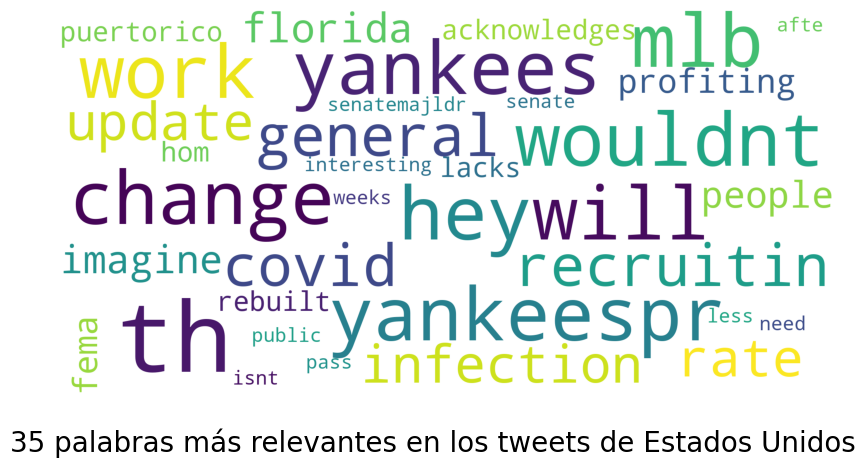

In [246]:
 word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=35,
                    max_font_size=50,
                    scale=5,
                    random_state=1).generate(str(dataUSA['texto EU']))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('35 palabras más relevantes en los tweets de Estados Unidos', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

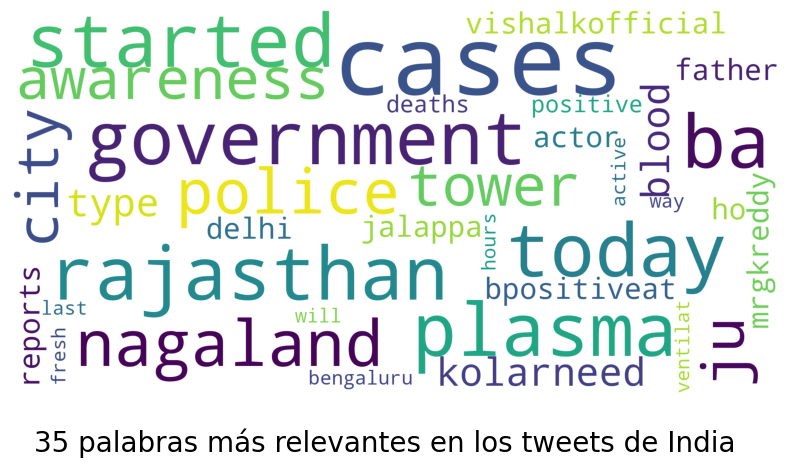

In [247]:
 word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=35,
                    max_font_size=50,
                    scale=5,
                    random_state=1).generate(str(dataInd['texto India']))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('35 palabras más relevantes en los tweets de India', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

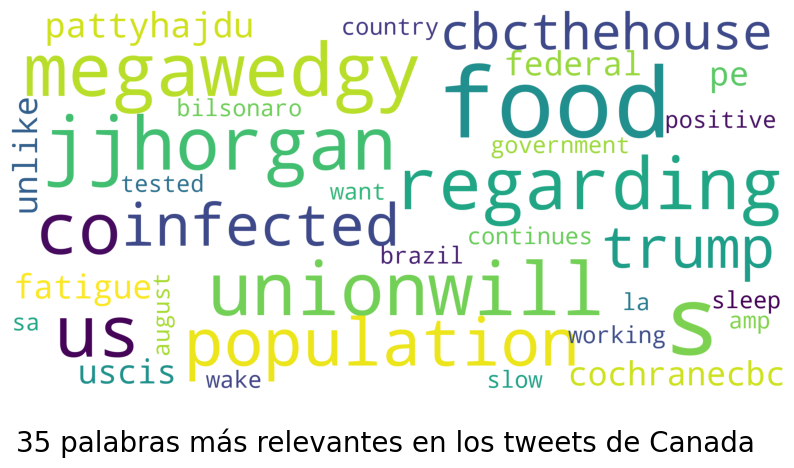

In [248]:
 word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=35,
                    max_font_size=50,
                    scale=5,
                    random_state=1).generate(str(dataCa['texto Canada']))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('35 palabras más relevantes en los tweets de Canada', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

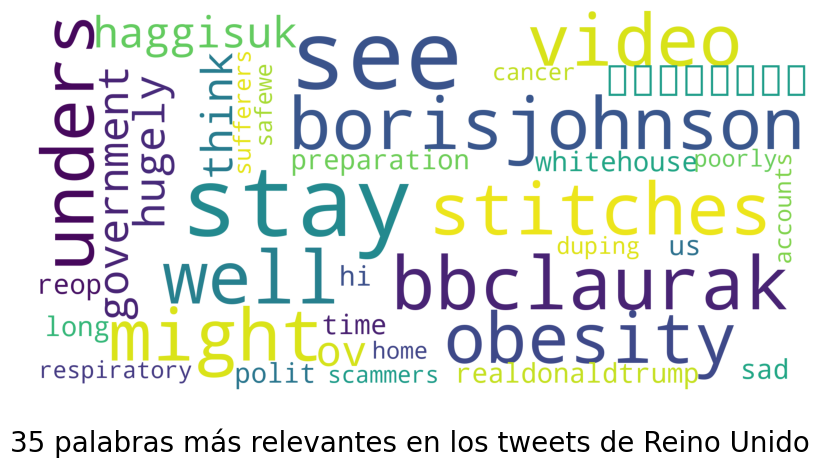

In [249]:
 word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=35,
                    max_font_size=50,
                    scale=5,
                    random_state=1).generate(str(dataUK['texto Reino Unido']))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('35 palabras más relevantes en los tweets de Reino Unido', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

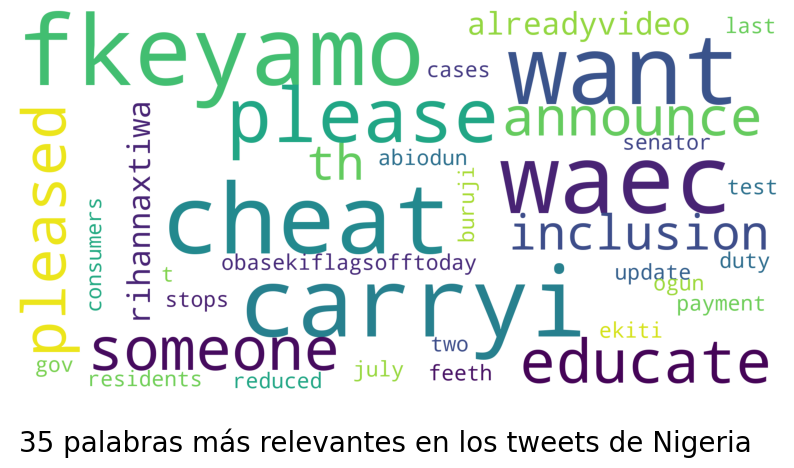

In [250]:
word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=35,
                    max_font_size=50,
                    scale=5,
                    random_state=1).generate(str(dataNi['texto Nigeria']))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('35 palabras más relevantes en los tweets de Nigeria', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()